Sweep Calib dataset size: 64, 128, 256, 512. Use exactly the same dataset for generating Ltilde

Calib and Ltilde size: 64 samples, mean abs Ltilde:  0.13000636332760823   min:  -0.030104637145996094   max:  1.6340444087982178
Calib and Ltilde size: 128 samples, mean abs Ltilde:  0.11186277059094832   min:  -0.012109875679016113   max:  1.3372292518615723
Calib and Ltilde size: 256 samples, mean abs Ltilde:  0.12137060883325781   min:  -0.013945221900939941   max:  1.3940895795822144
Calib and Ltilde size: 512 samples, mean abs Ltilde:  0.1198410682189159   min:  -0.014871716499328613   max:  1.4905238151550293


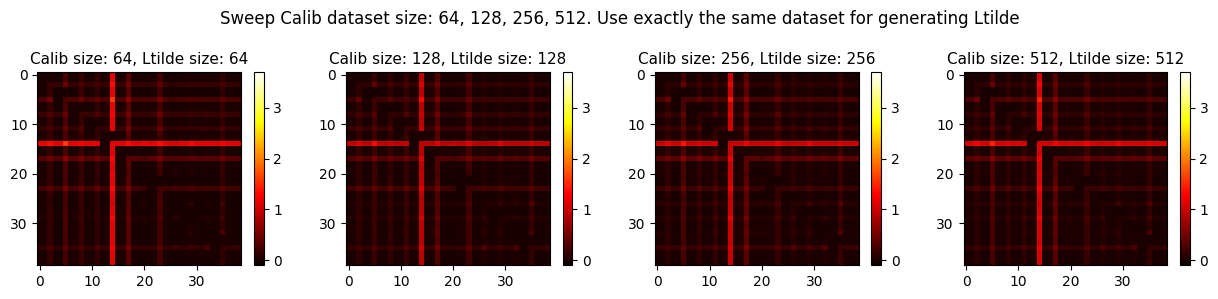

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib64.pkl','rb') as f:
    hm64 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128.pkl','rb') as f:
    hm128 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib256.pkl','rb') as f:
    hm256 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib512.pkl','rb') as f:
    hm512 = pickle.load(f)    


print("Calib and Ltilde size: 64 samples, mean abs Ltilde: ", np.mean(np.abs(hm64['Ltilde'])),"  min: ", np.min(hm64['Ltilde']),"  max: ", np.max(hm64['Ltilde']))
print("Calib and Ltilde size: 128 samples, mean abs Ltilde: ", np.mean(np.abs(hm128['Ltilde'])),"  min: ", np.min(hm128['Ltilde']),"  max: ", np.max(hm128['Ltilde']))
print("Calib and Ltilde size: 256 samples, mean abs Ltilde: ", np.mean(np.abs(hm256['Ltilde'])),"  min: ", np.min(hm256['Ltilde']),"  max: ", np.max(hm256['Ltilde']))
print("Calib and Ltilde size: 512 samples, mean abs Ltilde: ", np.mean(np.abs(hm512['Ltilde'])),"  min: ", np.min(hm512['Ltilde']),"  max: ", np.max(hm512['Ltilde']))
plt.rcParams['figure.figsize'] = (12.5,3)

plt.subplot(1, 4, 1)
plt.imshow(hm64['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 64, Ltilde size: 64", size=11)
plt.colorbar()

plt.subplot(1, 4, 2)
plt.imshow(hm128['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, Ltilde size: 128", size=11)
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(hm256['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 256, Ltilde size: 256", size=11)
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(hm512['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 512, Ltilde size: 512", size=11)
plt.colorbar()

plt.suptitle('Sweep Calib dataset size: 64, 128, 256, 512. Use exactly the same dataset for generating Ltilde') 
plt.tight_layout()
plt.show()    


Fix the calibrated model using 128 samples,  Use subset of the same dataset for computing Ltilde

Calib size 128, Ltilde samples 16, mean abs Ltilde:  0.10754085104376136   min:  -0.10012221336364746   max:  1.148252010345459
Calib size 128, Ltilde samples 32, mean abs Ltilde:  0.10195622657334467   min:  -0.07606518268585205   max:  1.1204206943511963
Calib size 128, Ltilde samples 64, mean abs Ltilde:  0.11127148248269948   min:  -0.049275994300842285   max:  1.39060378074646
Calib size 128, Ltilde samples 128, mean abs Ltilde:  0.11186277059094832   min:  -0.012109875679016113   max:  1.3372292518615723


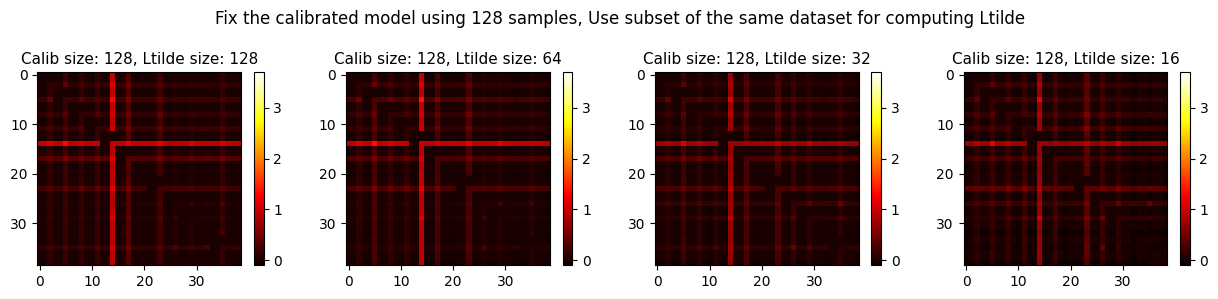

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset16.pkl','rb') as f:
    hm128_16 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset32.pkl','rb') as f:
    hm128_32 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset64.pkl','rb') as f:
    hm128_64 = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128.pkl','rb') as f:
    hm128_128 = pickle.load(f)    


print("Calib size 128, Ltilde samples 16, mean abs Ltilde: ", np.mean(np.abs(hm128_16['Ltilde'])),"  min: ", np.min(hm128_16['Ltilde']),"  max: ", np.max(hm128_16['Ltilde']))
print("Calib size 128, Ltilde samples 32, mean abs Ltilde: ", np.mean(np.abs(hm128_32['Ltilde'])),"  min: ", np.min(hm128_32['Ltilde']),"  max: ", np.max(hm128_32['Ltilde']))
print("Calib size 128, Ltilde samples 64, mean abs Ltilde: ", np.mean(np.abs(hm128_64['Ltilde'])),"  min: ", np.min(hm128_64['Ltilde']),"  max: ", np.max(hm128_64['Ltilde']))
print("Calib size 128, Ltilde samples 128, mean abs Ltilde: ", np.mean(np.abs(hm128_128['Ltilde'])),"  min: ", np.min(hm128_128['Ltilde']),"  max: ", np.max(hm128_128['Ltilde']))
plt.rcParams['figure.figsize'] = (12.5,3)
plt.subplot(1, 4, 1)
plt.imshow(hm128_128['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, Ltilde size: 128", size=11)
plt.colorbar()

plt.subplot(1, 4, 2)
plt.imshow(hm128_64['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, Ltilde size: 64", size=11)
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(hm128_32['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, Ltilde size: 32", size=11)
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(hm128_16['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, Ltilde size: 16", size=11)
plt.colorbar()

plt.suptitle('Fix the calibrated model using 128 samples, Use subset of the same dataset for computing Ltilde')
plt.tight_layout()
plt.show()

Fix the calibrated model using 128 samples, Use different subset of the training dataset for computing Ltilde

Calib size 128, Ltilde samples 16, mean abs Ltilde:  1.7611653147207758   min:  0.0   max:  3.7660927772521973
Calib size 128, Ltilde samples 32, mean abs Ltilde:  1.9622456820523715   min:  0.0   max:  3.5136559009552
Calib size 128, Ltilde samples 64, mean abs Ltilde:  1.6758193169511673   min:  0.0   max:  3.398444414138794
Calib size 128 set 1, Ltilde samples 128 set2, mean abs Ltilde:  1.4766277050517407   min:  0.0   max:  3.0542633533477783
Calib size 128 set 1, Ltilde samples 128 set3, mean abs Ltilde:  1.3854983766011546   min:  0.0   max:  2.9134774208068848


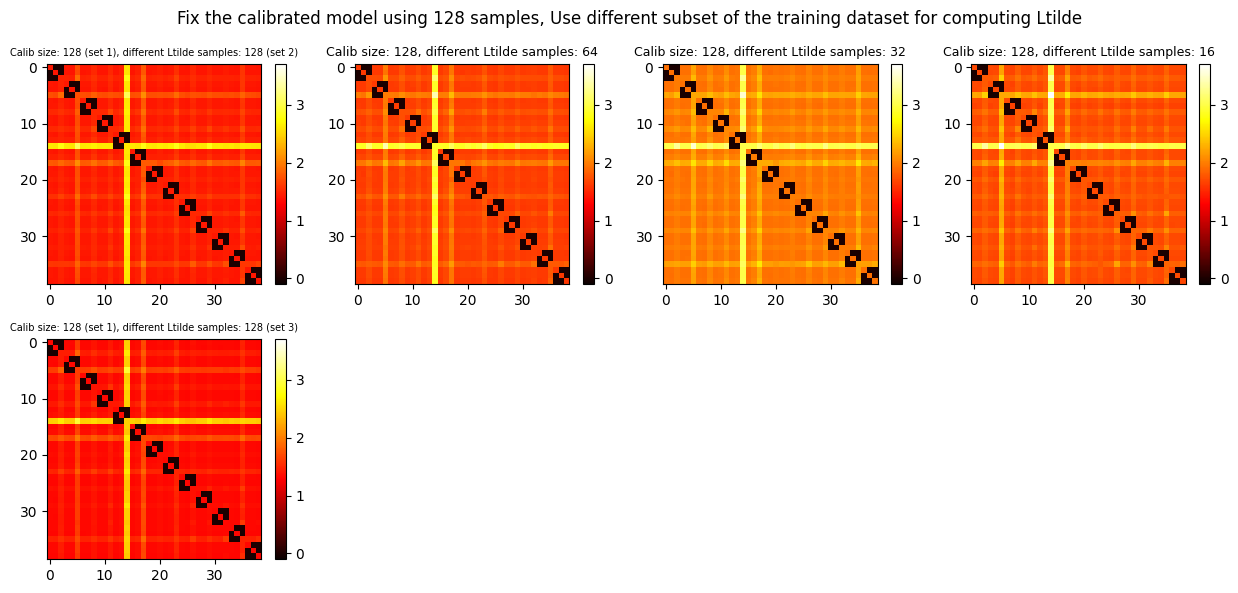

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset16_different.pkl','rb') as f:
    hm128_16_diff = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset32_different.pkl','rb') as f:
    hm128_32_diff = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset64_different.pkl','rb') as f:
    hm128_64_diff = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset128_different.pkl','rb') as f:
    hm128_128_diff = pickle.load(f)
with open('./Ltilde/cached_grad_bert_calib_w-8-4-2_calib128_subset128_different2.pkl','rb') as f:
    hm128_128_diff2 = pickle.load(f)    


print("Calib size 128, Ltilde samples 16, mean abs Ltilde: ", np.mean(np.abs(hm128_16_diff['Ltilde'])),"  min: ", np.min(hm128_16_diff['Ltilde']),"  max: ", np.max(hm128_16_diff['Ltilde']))
print("Calib size 128, Ltilde samples 32, mean abs Ltilde: ", np.mean(np.abs(hm128_32_diff['Ltilde'])),"  min: ", np.min(hm128_32_diff['Ltilde']),"  max: ", np.max(hm128_32_diff['Ltilde']))
print("Calib size 128, Ltilde samples 64, mean abs Ltilde: ", np.mean(np.abs(hm128_64_diff['Ltilde'])),"  min: ", np.min(hm128_64_diff['Ltilde']),"  max: ", np.max(hm128_64_diff['Ltilde']))
print("Calib size 128 set 1, Ltilde samples 128 set2, mean abs Ltilde: ", np.mean(np.abs(hm128_128_diff['Ltilde'])),"  min: ", np.min(hm128_128_diff['Ltilde']),"  max: ", np.max(hm128_128_diff['Ltilde']))
print("Calib size 128 set 1, Ltilde samples 128 set3, mean abs Ltilde: ", np.mean(np.abs(hm128_128_diff2['Ltilde'])),"  min: ", np.min(hm128_128_diff2['Ltilde']),"  max: ", np.max(hm128_128_diff2['Ltilde']))


plt.rcParams['figure.figsize'] = (12.5,6)
plt.subplot(2, 4, 1)
plt.imshow(hm128_128_diff['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128 (set 1), different Ltilde samples: 128 (set 2)", size=7)
plt.colorbar()

plt.subplot(2, 4, 2)
plt.imshow(hm128_64_diff['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, different Ltilde samples: 64", size=9)
plt.colorbar()

plt.subplot(2, 4, 3)
plt.imshow(hm128_32_diff['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, different Ltilde samples: 32", size=9)
plt.colorbar()

plt.subplot(2, 4, 4)
plt.imshow(hm128_16_diff['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128, different Ltilde samples: 16", size=9)
plt.colorbar()

plt.subplot(2, 4, 5)
plt.imshow(hm128_128_diff2['Ltilde'], vmin=-0.1, vmax=3.7, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Calib size: 128 (set 1), different Ltilde samples: 128 (set 3)", size=7)
plt.colorbar()

plt.suptitle('Fix the calibrated model using 128 samples, Use different subset of the training dataset for computing Ltilde')
plt.tight_layout()
plt.show()

In [4]:
import matplotlib.pyplot as plt
import pickle

with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib64.pkl','rb') as f:
    res64 = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128.pkl','rb') as f:
    res128 = pickle.load(f)       
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib256.pkl','rb') as f:
    res256 = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib512.pkl','rb') as f:
    res512 = pickle.load(f)

with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset64.pkl','rb') as f:
    res128_64 = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset32.pkl','rb') as f:
    res128_32 = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset16.pkl','rb') as f:
    res128_16 = pickle.load(f)     

with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset128_different.pkl','rb') as f:
    res128_128_diff = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset64_different.pkl','rb') as f:
    res128_64_diff = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset32_different.pkl','rb') as f:
    res128_32_diff = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_subset16_different.pkl','rb') as f:
    res128_16_diff = pickle.load(f)
    
clado_eval_f1_64, clado_eval_exact_match_64, clado_size_64, clado_bitops_64 = [], [], [], []
naive_eval_f1_64, naive_eval_exact_match_64, naive_size_64, naive_bitops_64 = [], [], [], []
clado_eval_f1_128, clado_eval_exact_match_128, clado_size_128, clado_bitops_128 = [], [], [], []
naive_eval_f1_128, naive_eval_exact_match_128, naive_size_128, naive_bitops_128 = [], [], [], []
clado_eval_f1_256, clado_eval_exact_match_256, clado_size_256, clado_bitops_256 = [], [], [], []
naive_eval_f1_256, naive_eval_exact_match_256, naive_size_256, naive_bitops_256 = [], [], [], []
clado_eval_f1_512, clado_eval_exact_match_512, clado_size_512, clado_bitops_512 = [], [], [], []
naive_eval_f1_512, naive_eval_exact_match_512, naive_size_512, naive_bitops_512 = [], [], [], []
clado_eval_f1_128_64, clado_eval_exact_match_128_64, clado_size_128_64, clado_bitops_128_64 = [], [], [], []
naive_eval_f1_128_64, naive_eval_exact_match_128_64, naive_size_128_64, naive_bitops_128_64 = [], [], [], []
clado_eval_f1_128_32, clado_eval_exact_match_128_32, clado_size_128_32, clado_bitops_128_32 = [], [], [], []
naive_eval_f1_128_32, naive_eval_exact_match_128_32, naive_size_128_32, naive_bitops_128_32 = [], [], [], []
clado_eval_f1_128_16, clado_eval_exact_match_128_16, clado_size_128_16, clado_bitops_128_16 = [], [], [], []
naive_eval_f1_128_16, naive_eval_exact_match_128_16, naive_size_128_16, naive_bitops_128_16 = [], [], [], []

clado_eval_f1_128_128_diff, clado_eval_exact_match_128_128_diff, clado_size_128_128_diff, clado_bitops_128_128_diff = [], [], [], []
naive_eval_f1_128_128_diff, naive_eval_exact_match_128_128_diff, naive_size_128_128_diff, naive_bitops_128_128_diff = [], [], [], []
clado_eval_f1_128_64_diff, clado_eval_exact_match_128_64_diff, clado_size_128_64_diff, clado_bitops_128_64_diff = [], [], [], []
naive_eval_f1_128_64_diff, naive_eval_exact_match_128_64_diff, naive_size_128_64_diff, naive_bitops_128_64_diff = [], [], [], []
clado_eval_f1_128_32_diff, clado_eval_exact_match_128_32_diff, clado_size_128_32_diff, clado_bitops_128_32_diff = [], [], [], []
naive_eval_f1_128_32_diff, naive_eval_exact_match_128_32_diff, naive_size_128_32_diff, naive_bitops_128_32_diff = [], [], [], []
clado_eval_f1_128_16_diff, clado_eval_exact_match_128_16_diff, clado_size_128_16_diff, clado_bitops_128_16_diff = [], [], [], []
naive_eval_f1_128_16_diff, naive_eval_exact_match_128_16_diff, naive_size_128_16_diff, naive_bitops_128_16_diff = [], [], [], []



/homes/sayehs/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
for item in res64['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_64.append(eval_f1)
    clado_eval_exact_match_64.append(eval_exact_match)
    clado_size_64.append(size)
    clado_bitops_64.append(bitops)

for item in res64['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_64.append(eval_f1)
    naive_eval_exact_match_64.append(eval_exact_match)
    naive_size_64.append(size)
    naive_bitops_64.append(bitops)
    
for item in res128['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128.append(eval_f1)
    clado_eval_exact_match_128.append(eval_exact_match)
    clado_size_128.append(size)
    clado_bitops_128.append(bitops)

for item in res128['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128.append(eval_f1)
    naive_eval_exact_match_128.append(eval_exact_match)
    naive_size_128.append(size)
    naive_bitops_128.append(bitops)

for item in res256['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_256.append(eval_f1)
    clado_eval_exact_match_256.append(eval_exact_match)
    clado_size_256.append(size)
    clado_bitops_256.append(bitops)

for item in res256['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_256.append(eval_f1)
    naive_eval_exact_match_256.append(eval_exact_match)
    naive_size_256.append(size)
    naive_bitops_256.append(bitops)

for item in res512['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_512.append(eval_f1)
    clado_eval_exact_match_512.append(eval_exact_match)
    clado_size_512.append(size)
    clado_bitops_512.append(bitops)

for item in res512['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_512.append(eval_f1)
    naive_eval_exact_match_512.append(eval_exact_match)
    naive_size_512.append(size)
    naive_bitops_512.append(bitops)

for item in res128_64['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_64.append(eval_f1)
    clado_eval_exact_match_128_64.append(eval_exact_match)
    clado_size_128_64.append(size)
    clado_bitops_128_64.append(bitops)

for item in res128_64['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_64.append(eval_f1)
    naive_eval_exact_match_128_64.append(eval_exact_match)
    naive_size_128_64.append(size)
    naive_bitops_128_64.append(bitops)

for item in res128_32['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_32.append(eval_f1)
    clado_eval_exact_match_128_32.append(eval_exact_match)
    clado_size_128_32.append(size)
    clado_bitops_128_32.append(bitops)

for item in res128_32['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_32.append(eval_f1)
    naive_eval_exact_match_128_32.append(eval_exact_match)
    naive_size_128_32.append(size)
    naive_bitops_128_32.append(bitops)

for item in res128_16['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_16.append(eval_f1)
    clado_eval_exact_match_128_16.append(eval_exact_match)
    clado_size_128_16.append(size)
    clado_bitops_128_16.append(bitops)

for item in res128_16['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_16.append(eval_f1)
    naive_eval_exact_match_128_16.append(eval_exact_match)
    naive_size_128_16.append(size)
    naive_bitops_128_16.append(bitops)

for item in res128_128_diff['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_128_diff.append(eval_f1)
    clado_eval_exact_match_128_128_diff.append(eval_exact_match)
    clado_size_128_128_diff.append(size)
    clado_bitops_128_128_diff.append(bitops)

for item in res128_128_diff['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_128_diff.append(eval_f1)
    naive_eval_exact_match_128_128_diff.append(eval_exact_match)
    naive_size_128_128_diff.append(size)
    naive_bitops_128_128_diff.append(bitops)

for item in res128_64_diff['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_64_diff.append(eval_f1)
    clado_eval_exact_match_128_64_diff.append(eval_exact_match)
    clado_size_128_64_diff.append(size)
    clado_bitops_128_64_diff.append(bitops)

for item in res128_64_diff['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_64_diff.append(eval_f1)
    naive_eval_exact_match_128_64_diff.append(eval_exact_match)
    naive_size_128_64_diff.append(size)
    naive_bitops_128_64_diff.append(bitops)

for item in res128_32_diff['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_32_diff.append(eval_f1)
    clado_eval_exact_match_128_32_diff.append(eval_exact_match)
    clado_size_128_32_diff.append(size)
    clado_bitops_128_32_diff.append(bitops)

for item in res128_32_diff['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_32_diff.append(eval_f1)
    naive_eval_exact_match_128_32_diff.append(eval_exact_match)
    naive_size_128_32_diff.append(size)
    naive_bitops_128_32_diff.append(bitops)


for item in res128_16_diff['clado_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    clado_eval_f1_128_16_diff.append(eval_f1)
    clado_eval_exact_match_128_16_diff.append(eval_exact_match)
    clado_size_128_16_diff.append(size)
    clado_bitops_128_16_diff.append(bitops)

for item in res128_16_diff['naive_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    naive_eval_f1_128_16_diff.append(eval_f1)
    naive_eval_exact_match_128_16_diff.append(eval_exact_match)
    naive_size_128_16_diff.append(size)
    naive_bitops_128_16_diff.append(bitops)

F1 score: Sweep Calib dataset size: 64, 128, 256, 512. Use exactly the same dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/1155998181.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


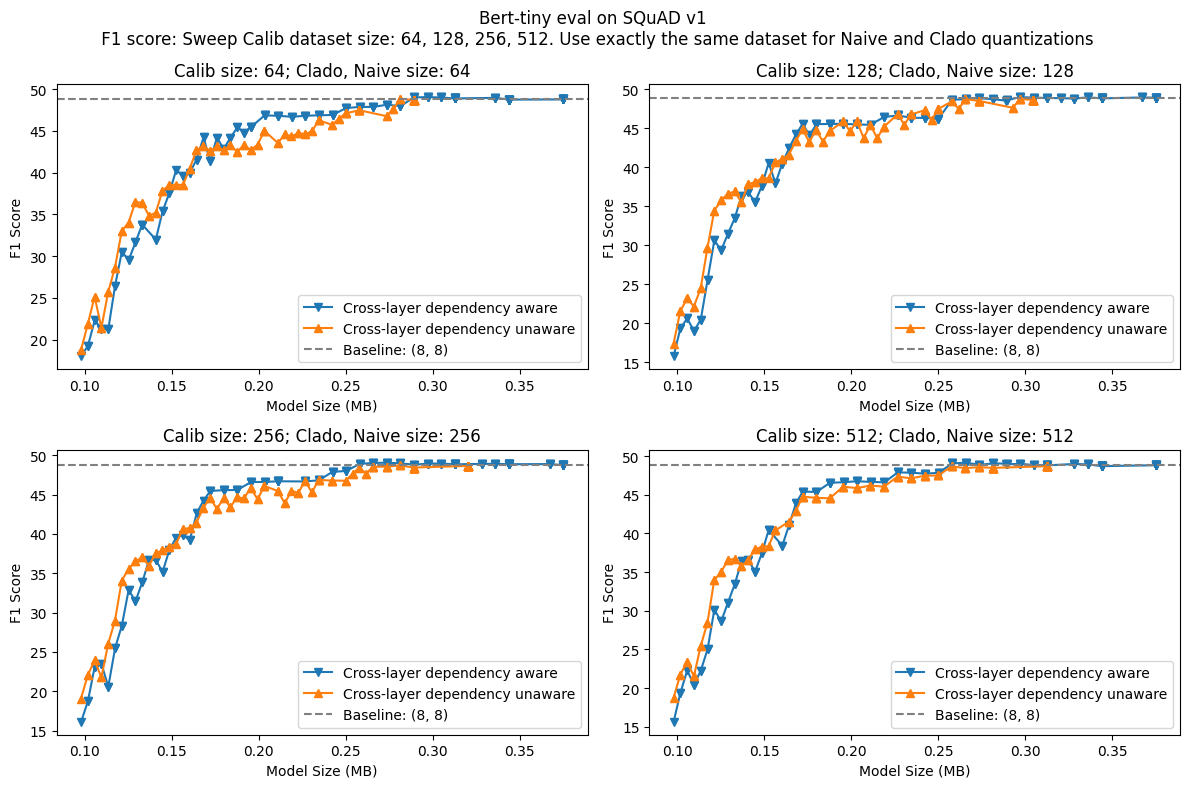

In [6]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])

plt.subplot(2, 2, 1)
plt.plot(clado_size_64,clado_eval_f1_64,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_64,naive_eval_f1_64,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.7715, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 64; Clado, Naive size: 64')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128,clado_eval_f1_128,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128,naive_eval_f1_128,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_256,clado_eval_f1_256,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_256,naive_eval_f1_256,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.7525, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 256; Clado, Naive size: 256')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_512,clado_eval_f1_512,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_512,naive_eval_f1_512,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.8238, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 512; Clado, Naive size: 512')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n F1 score: Sweep Calib dataset size: 64, 128, 256, 512. Use exactly the same dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()

Exact Match Score: Sweep Calib dataset size: 64, 128, 256, 512. Use the same dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/602548156.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


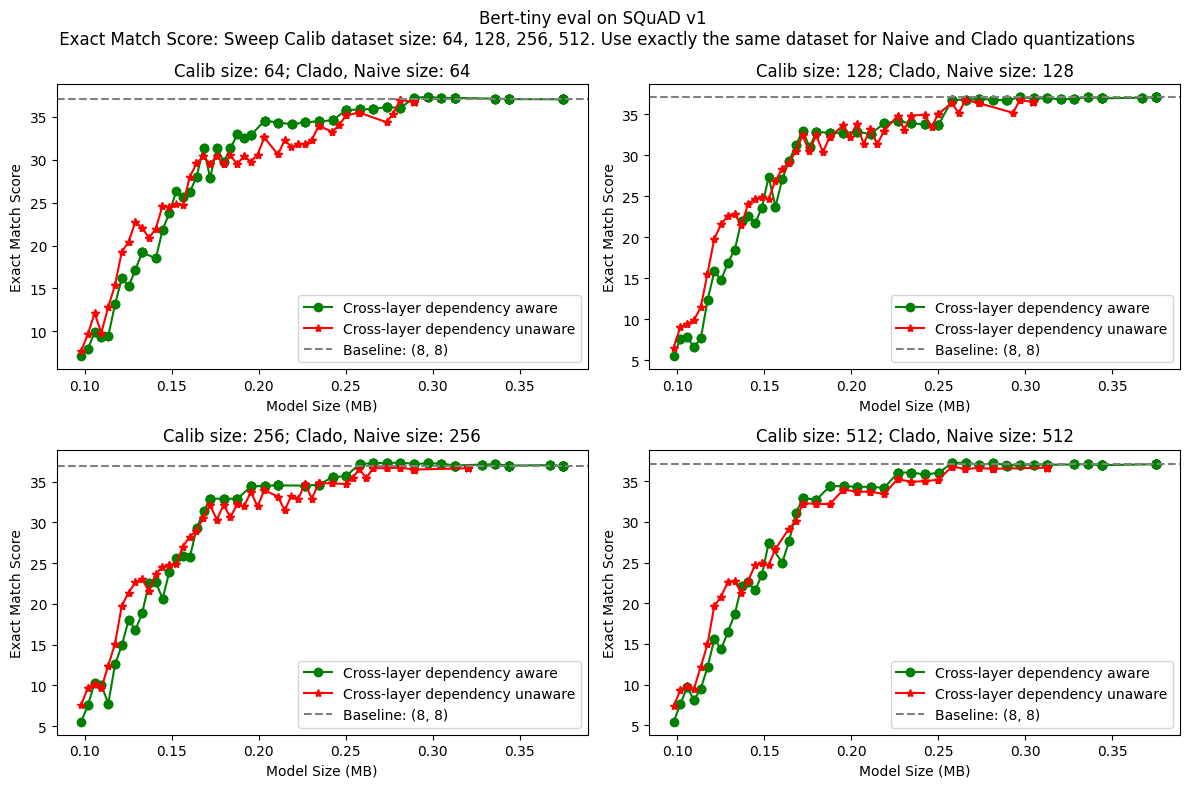

In [7]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])

plt.subplot(2, 2, 1)
plt.plot(clado_size_64,clado_eval_exact_match_64,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_64,naive_eval_exact_match_64,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0199, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 64; Clado, Naive size: 64')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128,clado_eval_exact_match_128,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128,naive_eval_exact_match_128,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0955, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 128')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_256,clado_eval_exact_match_256,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_256,naive_eval_exact_match_256,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=36.9158, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 256; Clado, Naive size: 256')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_512,clado_eval_exact_match_512,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_512,naive_eval_exact_match_512,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0672, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 512; Clado, Naive size: 512')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n Exact Match Score: Sweep Calib dataset size: 64, 128, 256, 512. Use exactly the same dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()


F1 Score: Fix the calibrated model using 128 samples, Use subset of the same dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/1396706791.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


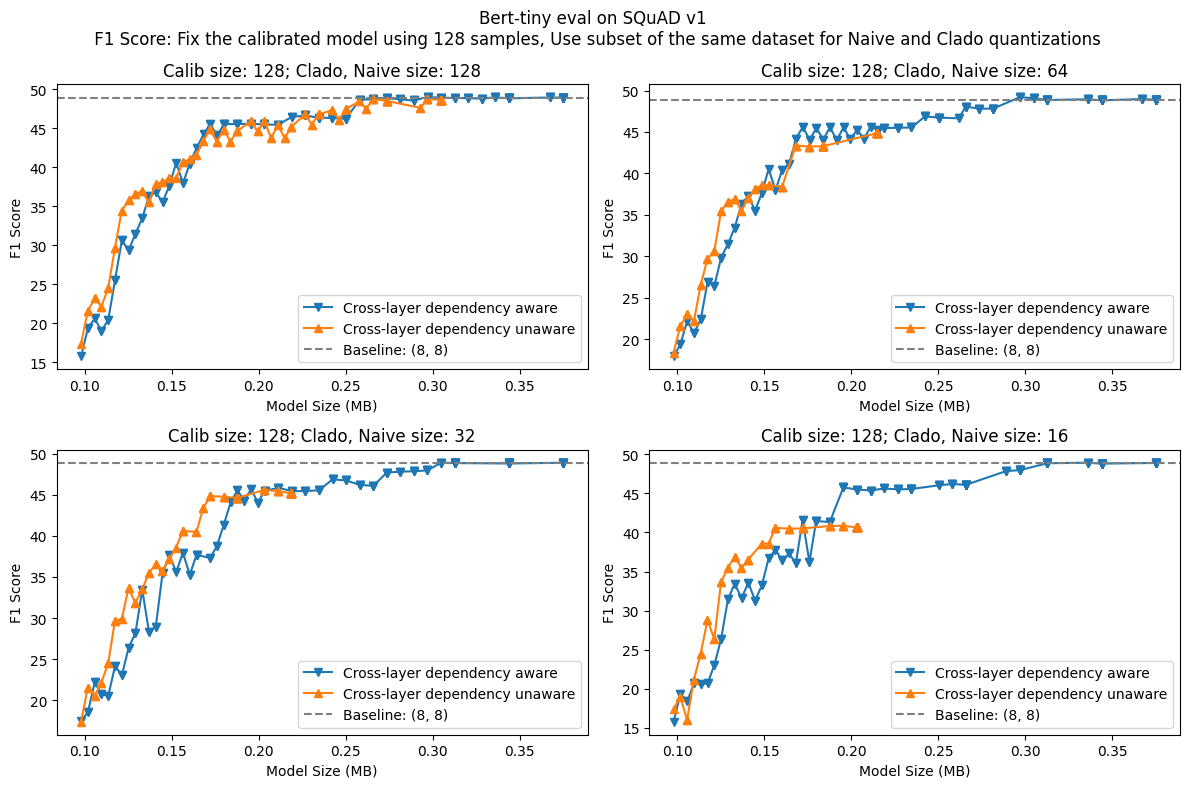

In [8]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])

plt.subplot(2, 2, 1)
plt.plot(clado_size_128,clado_eval_f1_128,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128,naive_eval_f1_128,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128_64,clado_eval_f1_128_64,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_64,naive_eval_f1_128_64,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 64')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_128_32,clado_eval_f1_128_32,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_32,naive_eval_f1_128_32,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 32')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_128_16,clado_eval_f1_128_16,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_16,naive_eval_f1_128_16,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 16')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n F1 Score: Fix the calibrated model using 128 samples, Use subset of the same dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()


Exact Match Score: Fix the calibrated model using 128 samples, Use subset of the same dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/2649474252.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


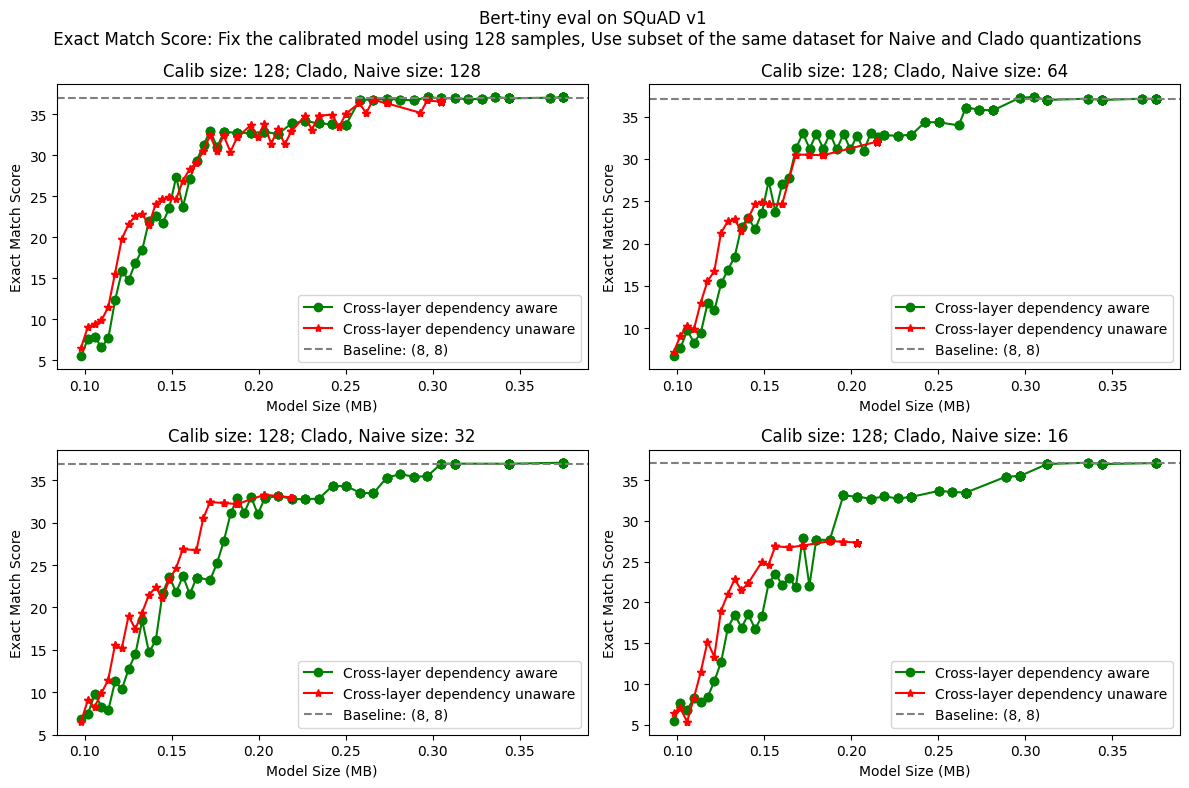

In [9]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])
plt.title('Bert-tiny eval on SQuAD v1')

plt.subplot(2, 2, 1)
plt.plot(clado_size_128,clado_eval_exact_match_128,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128,naive_eval_exact_match_128,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0199, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 128')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128_64,clado_eval_exact_match_128_64,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_64,naive_eval_exact_match_128_64,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0955, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 64')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_128_32,clado_eval_exact_match_128_32,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_32,naive_eval_exact_match_128_32,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=36.9158, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 32')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_128_16,clado_eval_exact_match_128_16,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_16,naive_eval_exact_match_128_16,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0672, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; Clado, Naive size: 16')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n Exact Match Score: Fix the calibrated model using 128 samples, Use subset of the same dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()


F1 Score: Fix the calibrated model using 128 samples, Use different subset of the training dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/3758163536.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


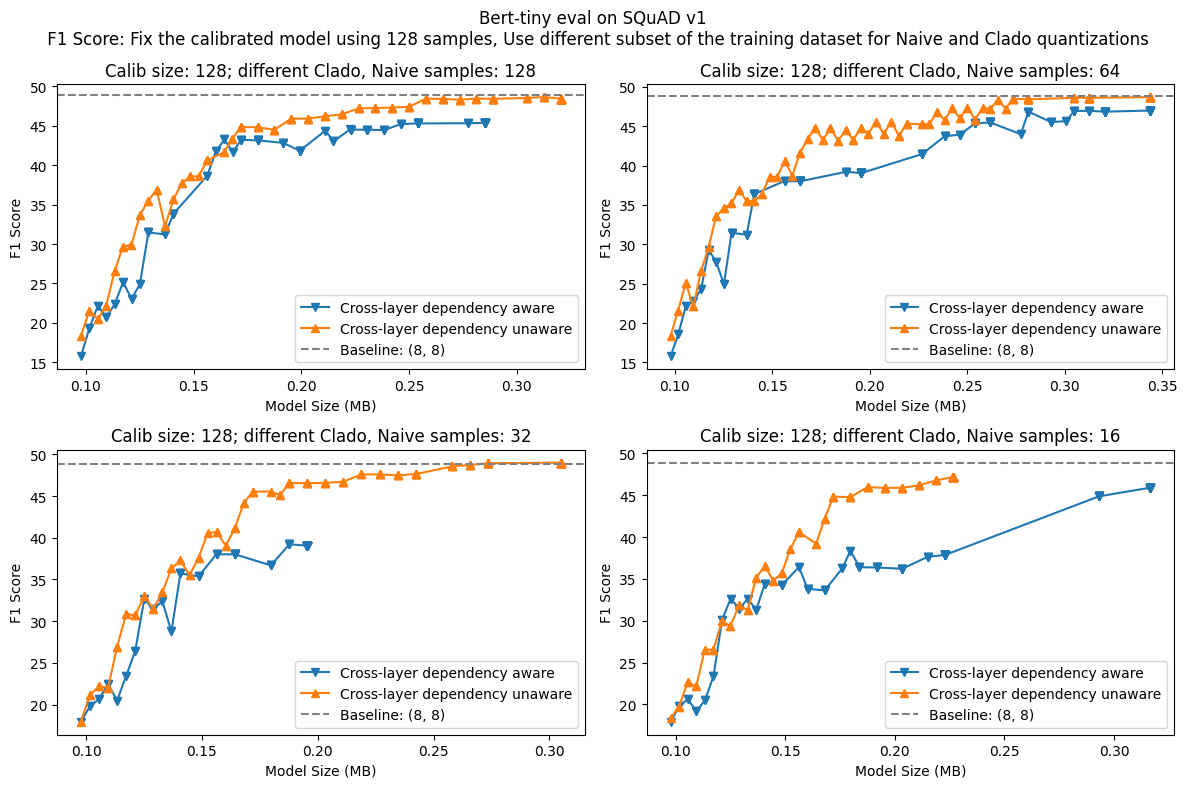

In [10]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])

plt.subplot(2, 2, 1)
plt.plot(clado_size_128_128_diff,clado_eval_f1_128_128_diff,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_128_diff,naive_eval_f1_128_128_diff,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128_64_diff,clado_eval_f1_128_64_diff,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_64_diff,naive_eval_f1_128_64_diff,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 64')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_128_32_diff,clado_eval_f1_128_32_diff,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_32_diff,naive_eval_f1_128_32_diff,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 32')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_128_16_diff,clado_eval_f1_128_16_diff,label='Cross-layer dependency aware',marker='v')
plt.plot(naive_size_128_16_diff,naive_eval_f1_128_16_diff,label='Cross-layer dependency unaware',marker='^')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 16')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n F1 Score: Fix the calibrated model using 128 samples, Use different subset of the training dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()


Exact Match Score: Fix the calibrated model using 128 samples, Use different subset of the training dataset for Naive and Clado quantizations

/tmp/ipykernel_1243435/1319319509.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


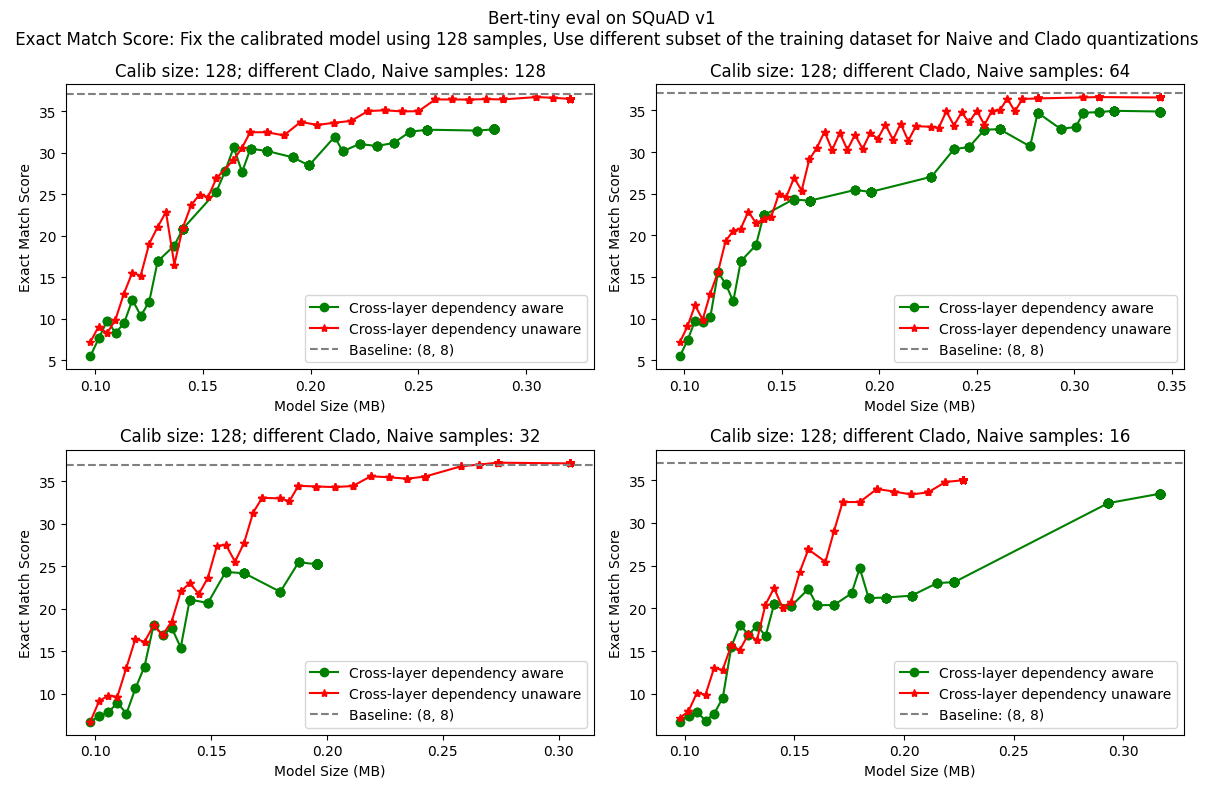

In [11]:
plt.rcParams['figure.figsize'] = (12,8)
plt.axis([0.05, 0.40, 0, 50])

plt.subplot(2, 2, 1)
plt.plot(clado_size_128_128_diff,clado_eval_exact_match_128_128_diff,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_128_diff,naive_eval_exact_match_128_128_diff,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0199, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 128')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(clado_size_128_64_diff,clado_eval_exact_match_128_64_diff,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_64_diff,naive_eval_exact_match_128_64_diff,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0955, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 64')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(clado_size_128_32_diff,clado_eval_exact_match_128_32_diff,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_32_diff,naive_eval_exact_match_128_32_diff,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=36.9158, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 32')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(clado_size_128_16_diff,clado_eval_exact_match_128_16_diff,label='Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_128_16_diff,naive_eval_exact_match_128_16_diff,label='Cross-layer dependency unaware',marker='*', color='r')
plt.axhline(y=37.0672, color='gray', linestyle='--', label='Baseline: (8, 8)')
plt.title('Calib size: 128; different Clado, Naive samples: 16')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()

plt.suptitle('Bert-tiny eval on SQuAD v1 \n Exact Match Score: Fix the calibrated model using 128 samples, Use different subset of the training dataset for Naive and Clado quantizations')
plt.tight_layout()
plt.show()


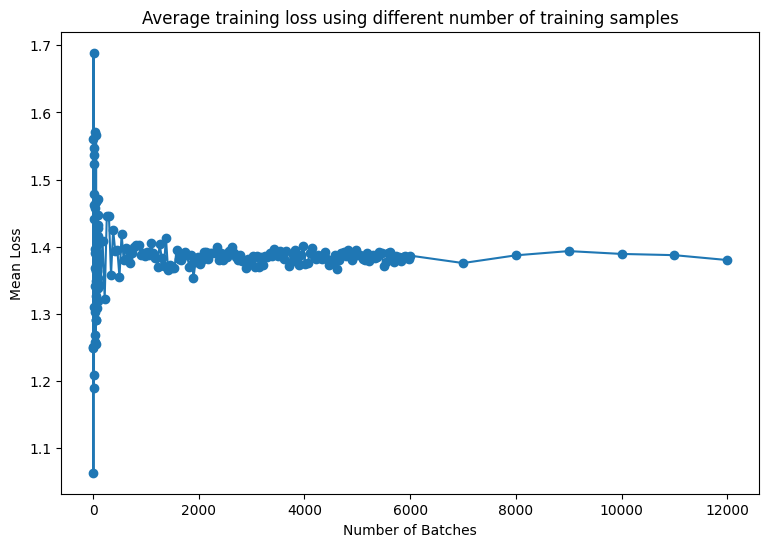

In [12]:
import matplotlib.pyplot as plt
import pickle

with open('./mean_loss_all-train.pkl','rb') as f:
    res = pickle.load(f)

mean_losses = []
for l in res['mean_losses']:
    mean_losses.append(l.to('cpu'))
plt.rcParams['figure.figsize'] = (9,6)
plt.plot(res['batch_nums'], mean_losses, marker='o')
plt.title('Average training loss using different number of training samples')
plt.ylabel('Mean Loss')
plt.xlabel('Number of Batches')
plt.show()

Ltilde accuracy study

Ltilde size: 128 samples, mean abs Ltilde:  0.1235245659036279   min:  -0.11537611484527588   max:  1.2682777643203735
Ltilde size: 256 samples, mean abs Ltilde:  0.11773355519748063   min:  -0.06560516357421875   max:  1.449721336364746
Ltilde size: 512 samples, mean abs Ltilde:  0.11363204437835212   min:  -0.04005587100982666   max:  1.4829970598220825
Ltilde size: 1024 samples, mean abs Ltilde:  0.11442167276147946   min:  -0.0254288911819458   max:  1.5271555185317993
Ltilde size: 2048 samples, mean abs Ltilde:  0.11762487919686422   min:  -0.020937800407409668   max:  1.5685884952545166
Ltilde size: 4096 samples, mean abs Ltilde:  0.11900611028790395   min:  -0.0168306827545166   max:  1.54987370967865
Ltilde size: 8192 samples, mean abs Ltilde:  0.1182081160147201   min:  -0.014817118644714355   max:  1.5313347578048706
Ltilde size: 16384 samples, mean abs Ltilde:  0.11868868737844634   min:  -0.014152884483337402   max:  1.5446226596832275
Ltilde size: 32768 samples, mean abs L

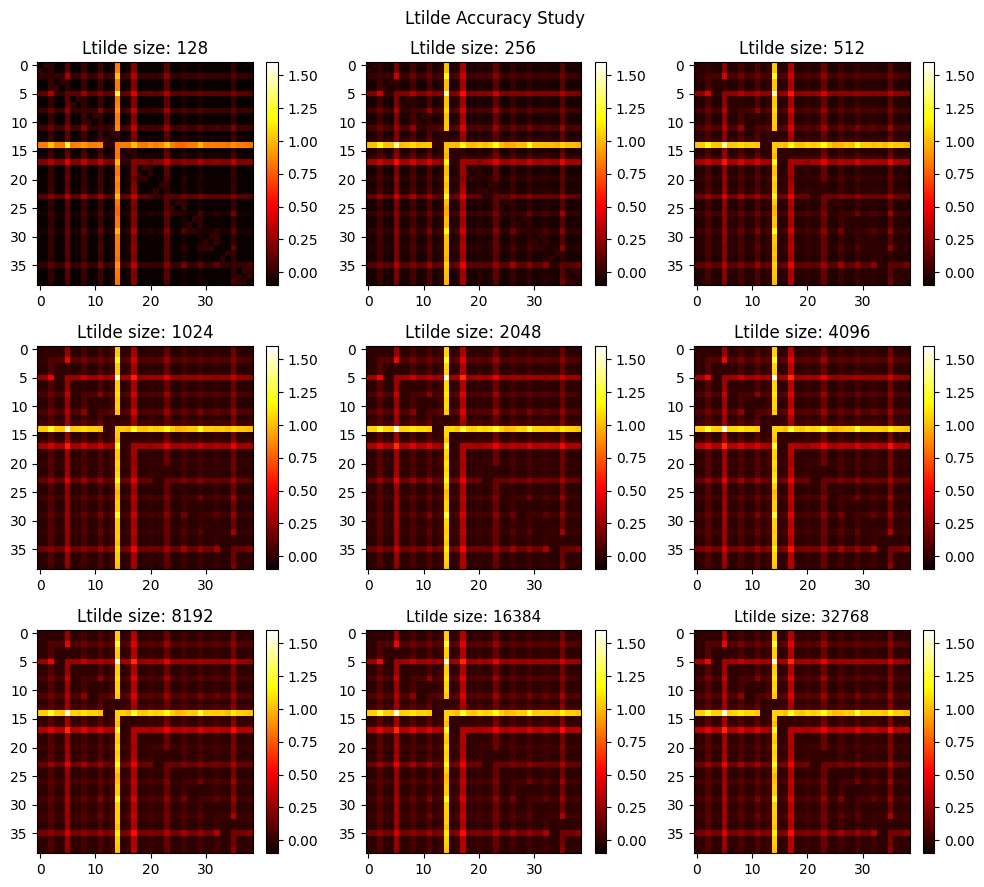

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_128.pkl','rb') as f:
    hm128 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_256.pkl','rb') as f:
    hm256 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_512.pkl','rb') as f:
    hm512 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_1024.pkl','rb') as f:
    hm1024 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_2048.pkl','rb') as f:
    hm2048 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_4096.pkl','rb') as f:
    hm4096 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_8192.pkl','rb') as f:
    hm8192 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_16384.pkl','rb') as f:
    hm16384 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_32768.pkl','rb') as f:
    hm32768 = pickle.load(f)



print("Ltilde size: 128 samples, mean abs Ltilde: ", np.mean(np.abs(hm128['Ltilde'])),"  min: ", np.min(hm128['Ltilde']),"  max: ", np.max(hm128['Ltilde']))
print("Ltilde size: 256 samples, mean abs Ltilde: ", np.mean(np.abs(hm256['Ltilde'])),"  min: ", np.min(hm256['Ltilde']),"  max: ", np.max(hm256['Ltilde']))
print("Ltilde size: 512 samples, mean abs Ltilde: ", np.mean(np.abs(hm512['Ltilde'])),"  min: ", np.min(hm512['Ltilde']),"  max: ", np.max(hm512['Ltilde']))
print("Ltilde size: 1024 samples, mean abs Ltilde: ", np.mean(np.abs(hm1024['Ltilde'])),"  min: ", np.min(hm1024['Ltilde']),"  max: ", np.max(hm1024['Ltilde']))
print("Ltilde size: 2048 samples, mean abs Ltilde: ", np.mean(np.abs(hm2048['Ltilde'])),"  min: ", np.min(hm2048['Ltilde']),"  max: ", np.max(hm2048['Ltilde']))
print("Ltilde size: 4096 samples, mean abs Ltilde: ", np.mean(np.abs(hm4096['Ltilde'])),"  min: ", np.min(hm4096['Ltilde']),"  max: ", np.max(hm4096['Ltilde']))
print("Ltilde size: 8192 samples, mean abs Ltilde: ", np.mean(np.abs(hm8192['Ltilde'])),"  min: ", np.min(hm8192['Ltilde']),"  max: ", np.max(hm8192['Ltilde']))
print("Ltilde size: 16384 samples, mean abs Ltilde: ", np.mean(np.abs(hm16384['Ltilde'])),"  min: ", np.min(hm16384['Ltilde']),"  max: ", np.max(hm16384['Ltilde']))
print("Ltilde size: 32768 samples, mean abs Ltilde: ", np.mean(np.abs(hm32768['Ltilde'])),"  min: ", np.min(hm32768['Ltilde']),"  max: ", np.max(hm32768['Ltilde']))
plt.rcParams['figure.figsize'] = (10,9)

plt.subplot(3, 3, 1)
plt.imshow(hm128['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 128", size=12)
plt.colorbar()

plt.subplot(3, 3, 2)
plt.imshow(hm256['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 256", size=12)
plt.colorbar()

plt.subplot(3, 3, 3)
plt.imshow(hm512['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 512", size=12)
plt.colorbar()

plt.subplot(3, 3, 4)
plt.imshow(hm1024['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 1024", size=12)
plt.colorbar()

plt.subplot(3, 3, 5)
plt.imshow(hm2048['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 2048", size=12)
plt.colorbar()

plt.subplot(3, 3, 6)
plt.imshow(hm4096['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 4096", size=12)
plt.colorbar()

plt.subplot(3, 3, 7)
plt.imshow(hm8192['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 8192", size=12)
plt.colorbar()

plt.subplot(3, 3, 8)
plt.imshow(hm16384['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 16384", size=11)
plt.colorbar()

plt.subplot(3, 3, 9)
plt.imshow(hm32768['Ltilde'], vmin=-0.1, vmax=1.6, cmap='hot', aspect='auto', interpolation='nearest')
plt.title("Ltilde size: 32768", size=11)
plt.colorbar()

plt.suptitle('Ltilde Accuracy Study') 
plt.tight_layout()
plt.show()    


Ltilde L1 Norm, Ltilde calculated with batch size 2048 (32768 samples) is the reference.

[0.1015279428650093, 0.043232606948009844, 0.024568022042023047, 0.012831170256399623, 0.007163522041290705, 0.003340985021020612, 0.002261091109406862, 0.0011057246287820529]
[0.10318303413880177, 0.04698916581960825, 0.024512428503770094, 0.011932889620463053, 0.006387077845059908, 0.002957322658636631, 0.001761314196464343, 0.0008014623935406024]


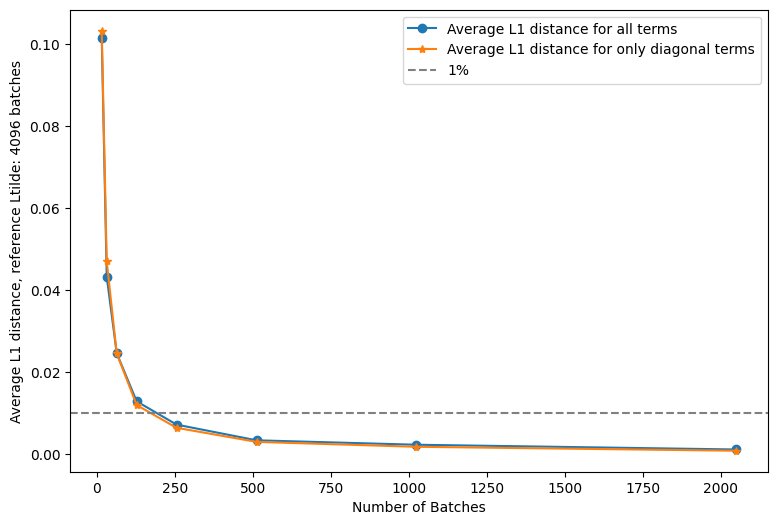

In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_128.pkl','rb') as f:
    hm128 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_256.pkl','rb') as f:
    hm256 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_512.pkl','rb') as f:
    hm512 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_1024.pkl','rb') as f:
    hm1024 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_2048.pkl','rb') as f:
    hm2048 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_4096.pkl','rb') as f:
    hm4096 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_8192.pkl','rb') as f:
    hm8192 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_16384.pkl','rb') as f:
    hm16384 = pickle.load(f)
with open('./Ltilde_Study/cached_grad_bert_calib_w-8-4-2_calib128_Ltilde_32768.pkl','rb') as f:
    hm32768 = pickle.load(f)

L1_128 = np.mean(np.abs(hm32768['Ltilde'] - hm128['Ltilde']))
L1_256 = np.mean(np.abs(hm32768['Ltilde'] - hm256['Ltilde']))
L1_512 = np.mean(np.abs(hm32768['Ltilde'] - hm512['Ltilde']))
L1_1024 = np.mean(np.abs(hm32768['Ltilde'] - hm1024['Ltilde']))
L1_2048 = np.mean(np.abs(hm32768['Ltilde'] - hm2048['Ltilde']))
L1_4096 = np.mean(np.abs(hm32768['Ltilde'] - hm4096['Ltilde']))
L1_8192 = np.mean(np.abs(hm32768['Ltilde'] - hm8192['Ltilde']))
L1_16384 = np.mean(np.abs(hm32768['Ltilde'] - hm16384['Ltilde']))

L_size = hm32768['Ltilde'].shape[0]
L1_128_diag_term = [hm32768['Ltilde'][i][i] - hm128['Ltilde'][i][i] for i in range(L_size)]
L1_256_diag_term = [hm32768['Ltilde'][i][i] - hm256['Ltilde'][i][i] for i in range(L_size)]
L1_512_diag_term = [hm32768['Ltilde'][i][i] - hm512['Ltilde'][i][i] for i in range(L_size)]
L1_1024_diag_term = [hm32768['Ltilde'][i][i] - hm1024['Ltilde'][i][i] for i in range(L_size)]
L1_2048_diag_term = [hm32768['Ltilde'][i][i] - hm2048['Ltilde'][i][i] for i in range(L_size)]
L1_4096_diag_term = [hm32768['Ltilde'][i][i] - hm4096['Ltilde'][i][i] for i in range(L_size)]
L1_8192_diag_term = [hm32768['Ltilde'][i][i] - hm8192['Ltilde'][i][i] for i in range(L_size)]
L1_16384_diag_term = [hm32768['Ltilde'][i][i] - hm16384['Ltilde'][i][i] for i in range(L_size)]

L1_128_diagonal = np.mean(np.abs(L1_128_diag_term))
L1_256_diagonal = np.mean(np.abs(L1_256_diag_term))
L1_512_diagonal = np.mean(np.abs(L1_512_diag_term))
L1_1024_diagonal = np.mean(np.abs(L1_1024_diag_term))
L1_2048_diagonal = np.mean(np.abs(L1_2048_diag_term))
L1_4096_diagonal = np.mean(np.abs(L1_4096_diag_term))
L1_8192_diagonal = np.mean(np.abs(L1_8192_diag_term))
L1_16384_diagonal = np.mean(np.abs(L1_16384_diag_term))

x = [16, 32, 64, 128, 256, 512, 1024, 2048]
y = [L1_128, L1_256, L1_512, L1_1024, L1_2048, L1_4096, L1_8192, L1_16384]
y_diagonal = [L1_128_diagonal, L1_256_diagonal, L1_512_diagonal, L1_1024_diagonal, L1_2048_diagonal, L1_4096_diagonal, L1_8192_diagonal, L1_16384_diagonal]
print(y)
print(y_diagonal)

plt.rcParams['figure.figsize'] = (9,6)
plt.plot(x, y, marker='o', label = 'Average L1 distance for all terms')
plt.plot(x, y_diagonal, marker='*', label = 'Average L1 distance for only diagonal terms')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Average L1 distance, reference Ltilde: 4096 batches')
plt.xlabel('Number of Batches')
plt.axhline(y=0.01, color='gray', linestyle='--', label="1%")
plt.legend()
plt.show()

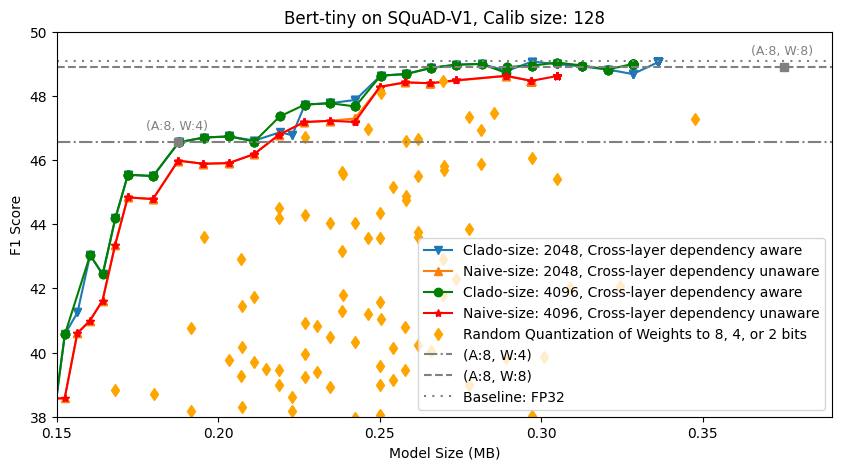

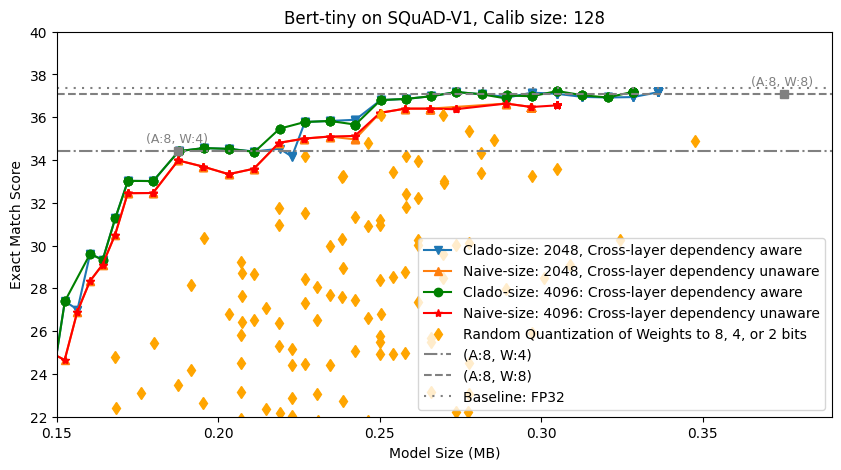

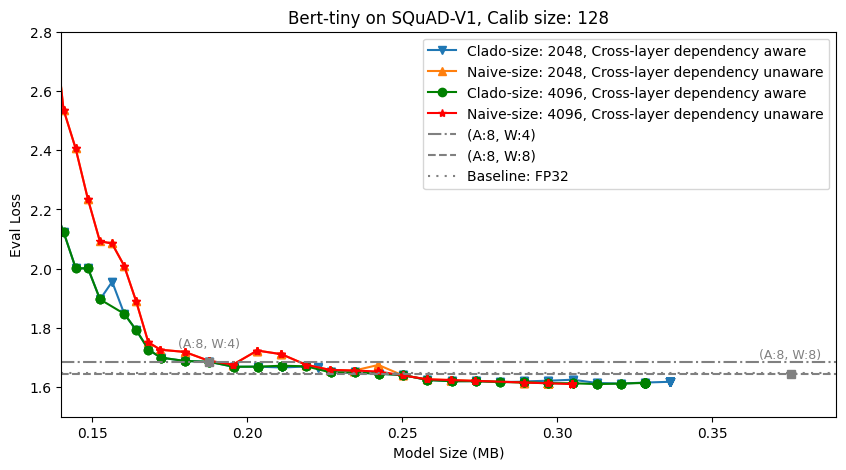

In [15]:
import matplotlib.pyplot as plt
import pickle

with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_Ltilde_2048_eval-loss.pkl','rb') as f:
    res128_2048 = pickle.load(f)
with open('./Clado_Naive_res/clado_naive_a8_w8-4-2_calib128_Ltilde_4096_eval-loss.pkl','rb') as f:
    res128_4096 = pickle.load(f)
with open('./rand_quant_a8_w8-4-2_calib128.pkl','rb') as f:
    res128_rand_quant = pickle.load(f)

clado_eval_f1_2048, clado_eval_exact_match_2048, clado_eval_loss_2048, clado_size_2048, clado_bitops_2048 = [], [], [], [], []
naive_eval_f1_2048, naive_eval_exact_match_2048, naive_eval_loss_2048, naive_size_2048, naive_bitops_2048 = [], [], [], [], []
clado_eval_f1_4096, clado_eval_exact_match_4096, clado_eval_loss_4096, clado_size_4096, clado_bitops_4096 = [], [], [], [], []
naive_eval_f1_4096, naive_eval_exact_match_4096, naive_eval_loss_4096, naive_size_4096, naive_bitops_4096 = [], [], [], [], []
rand_quant_eval_f1, rand_quant_eval_exact_match, rand_quant_size, rand_quant_bitops = [], [], [], []


for item in res128_2048['clado_res']:
    eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
    clado_eval_f1_2048.append(eval_f1)
    clado_eval_exact_match_2048.append(eval_exact_match)
    clado_eval_loss_2048.append(eval_loss)
    clado_size_2048.append(size)
    clado_bitops_2048.append(bitops)

for item in res128_2048['naive_res']:
    eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
    naive_eval_f1_2048.append(eval_f1)
    naive_eval_exact_match_2048.append(eval_exact_match)
    naive_eval_loss_2048.append(eval_loss)
    naive_size_2048.append(size)
    naive_bitops_2048.append(bitops)

for item in res128_4096['clado_res']:
    eval_f1, eval_exact_match, eval_loss , size, bitops, _ = item
    clado_eval_f1_4096.append(eval_f1)
    clado_eval_exact_match_4096.append(eval_exact_match)
    clado_eval_loss_4096.append(eval_loss)
    clado_size_4096.append(size)
    clado_bitops_4096.append(bitops)

for item in res128_4096['naive_res']:
    eval_f1, eval_exact_match, eval_loss , size, bitops, _ = item
    naive_eval_f1_4096.append(eval_f1)
    naive_eval_exact_match_4096.append(eval_exact_match)
    naive_eval_loss_4096.append(eval_loss)
    naive_size_4096.append(size)
    naive_bitops_4096.append(bitops)

for item in res128_rand_quant['rand_quant_res']:
    eval_f1, eval_exact_match, _ , size, bitops, _ = item
    rand_quant_eval_f1.append(eval_f1)
    rand_quant_eval_exact_match.append(eval_exact_match)
    rand_quant_size.append(size)
    rand_quant_bitops.append(bitops)


plt.rcParams['figure.figsize'] = (10,5)
plt.axis([0.15, 0.39, 38, 50])
plt.plot(clado_size_2048,clado_eval_f1_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_f1_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')
plt.plot(clado_size_4096,clado_eval_f1_4096,label='Clado-size: 4096, Cross-layer dependency aware', marker='o', color='g')
plt.plot(naive_size_4096,naive_eval_f1_4096,label='Naive-size: 4096, Cross-layer dependency unaware', marker='*', color='r')
plt.plot(rand_quant_size,rand_quant_eval_f1,label='Random Quantization of Weights to 8, 4, or 2 bits', marker='d', color='orange', linestyle='None')

#plt.plot([0.093811035],[15.237460036722807], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 16.037460036722807), size=9, color='gray')
#plt.axhline(y=15.237460036722807, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[46.556981781593855], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 46.956981781593855), size=9, color='gray')
plt.axhline(y=46.556981781593855, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[48.9000], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 49.30), size=9, color='gray')
plt.axhline(y=48.9000, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=49.080300956794076, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')


plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()



plt.axis([0.15, 0.39, 22, 40])
plt.plot(clado_size_2048,clado_eval_exact_match_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_exact_match_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')
plt.plot(clado_size_4096,clado_eval_exact_match_4096,label='Clado-size: 4096: Cross-layer dependency aware',marker='o', color='g')
plt.plot(naive_size_4096,naive_eval_exact_match_4096,label='Naive-size: 4096: Cross-layer dependency unaware',marker='*', color='r')
plt.plot(rand_quant_size,rand_quant_eval_exact_match,label='Random Quantization of Weights to 8, 4, or 2 bits', marker='d', color='orange', linestyle='None')

#plt.plot([0.093811035],[5.335856196783349], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 5.735856196783349), size=9, color='gray')
#plt.axhline(y=5.335856196783349, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[34.437086092715234], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 34.837086092715234), size=9, color='gray')
plt.axhline(y=34.437086092715234, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[37.095553453169344], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 37.495553453169344), size=9, color='gray')
plt.axhline(y=37.095553453169344, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=37.360454115421, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')

plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('Exact Match Score')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = (10,5)
plt.axis([0.14, 0.39, 1.5, 2.8])
plt.plot(clado_size_2048,clado_eval_loss_2048,label='Clado-size: 2048, Cross-layer dependency aware',marker='v')
plt.plot(naive_size_2048,naive_eval_loss_2048,label='Naive-size: 2048, Cross-layer dependency unaware',marker='^')
plt.plot(clado_size_4096,clado_eval_loss_4096,label='Clado-size: 4096, Cross-layer dependency aware', marker='o', color='g')
plt.plot(naive_size_4096,naive_eval_loss_4096,label='Naive-size: 4096, Cross-layer dependency unaware', marker='*', color='r')

#plt.plot([0.093811035],[3.790600299835205], color='gray', marker='s')
#plt.annotate("(A:8, W:2)", (0.083811035, 3.790600299835205), size=9, color='gray')
#plt.axhline(y=3.790600299835205, color='gray', linestyle=':', label='(A:8, W:2)')

plt.plot([0.18762207],[1.683718204498291], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 1.733718204498291), size=9, color='gray')
plt.axhline(y=1.683718204498291, color='gray', linestyle='-.', label='(A:8, W:4)')

plt.plot([0.375244141],[1.6458874940872192], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 1.6958874940872192), size=9, color='gray')
plt.axhline(y=1.6458874940872192, color='gray', linestyle='--', label='(A:8, W:8)')

plt.axhline(y=1.6474617719650269, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')


plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('Eval Loss')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pickle



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
for method in methods:
    for batch_num in batch_nums:
        for repeat in range(5):
            n_samples = batch_num * 8
            cmd = f'{method}_eval_f1_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_eval_exact_match_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_eval_loss_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_size_{n_samples}_repeat{repeat} = []'
            exec(cmd)
            cmd = f'{method}_bitops_{n_samples}_repeat{repeat} = []'
            exec(cmd)


for batch_num in batch_nums:
    for repeat in range(4):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        
        file_name = f'./variance_study/Clado_Naive_MPQCO_res/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f) 
        for method in methods:
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_eval_f1_{n_samples}_repeat{repeat}.append({eval_f1})'
                exec(cmd)
                cmd = f'{method}_eval_exact_match_{n_samples}_repeat{repeat}.append({eval_exact_match})'
                exec(cmd)
                cmd = f'{method}_eval_loss_{n_samples}_repeat{repeat}.append({eval_loss})'
                exec(cmd)
                cmd = f'{method}_size_{n_samples}_repeat{repeat}.append({size})'
                exec(cmd)
                cmd = f'{method}_bitops_{n_samples}_repeat{repeat}.append({bitops})'
                exec(cmd)

batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(0.10,0.40,11)

for batch_num in batch_nums:
    n_samples = batch_num * 8
    plt.rcParams['figure.figsize'] = (10,5)
    plt.axis([0.15, 0.39, 5, 40])
    for method in methods:
        for repeat in range(4):
            plt.plot(eval(f'{method}_size_{n_samples}_repeat{repeat}'), eval(f'{method}_eval_exact_match_{n_samples}_repeat{repeat}'), label=f'{method}_sample-size: {n_samples}, repeat: {repeat}')
    plt.ylabel('Eval Exact match')
    plt.xlabel('Model Size (MB)')
    plt.title(f'Bert-tiny on SQuAD-V1, Calib size: 128, MPQCO-Clado-Naive size: {n_samples}')
    plt.legend()
    plt.show()


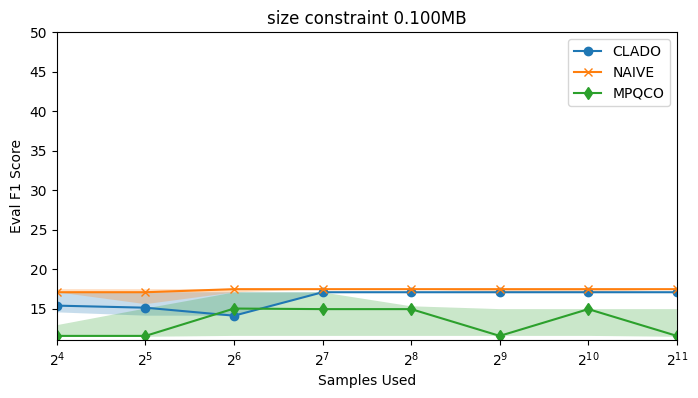

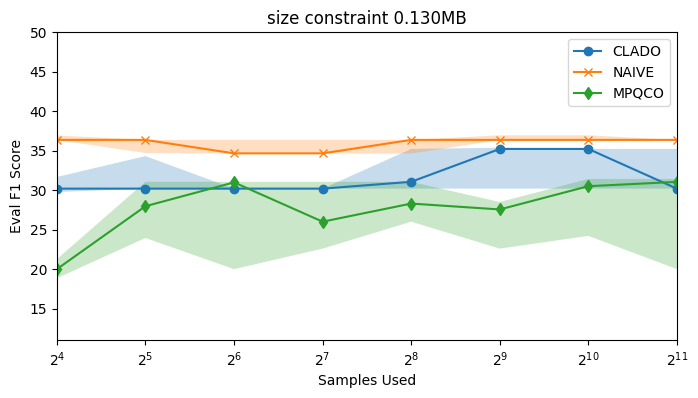

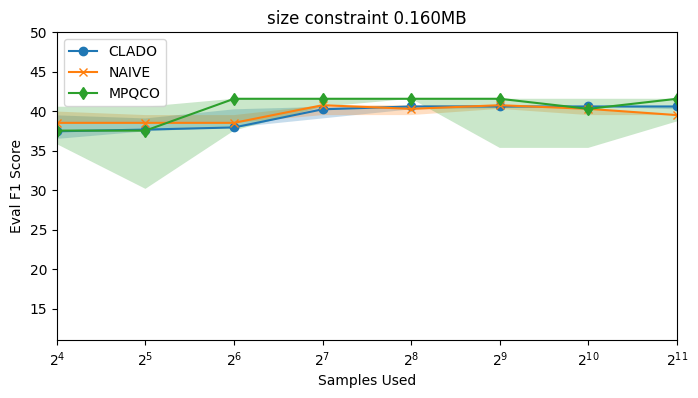

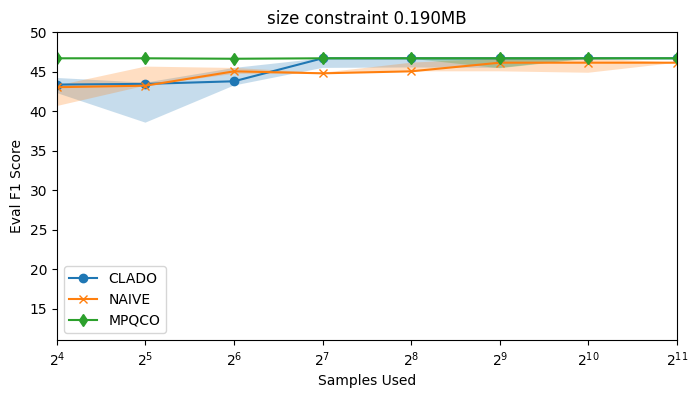

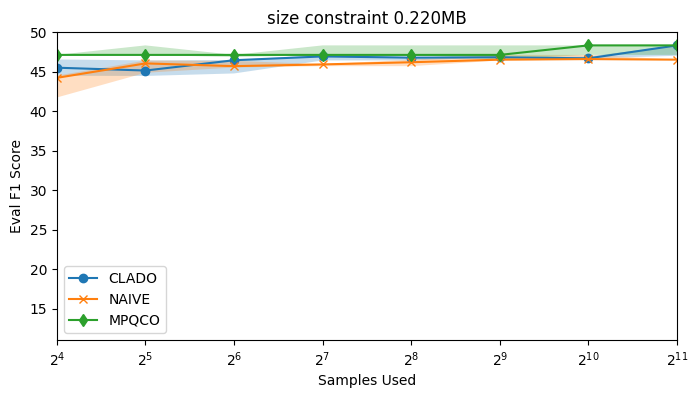

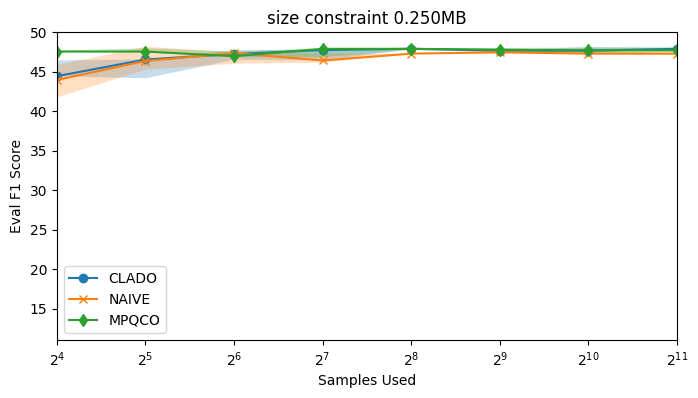

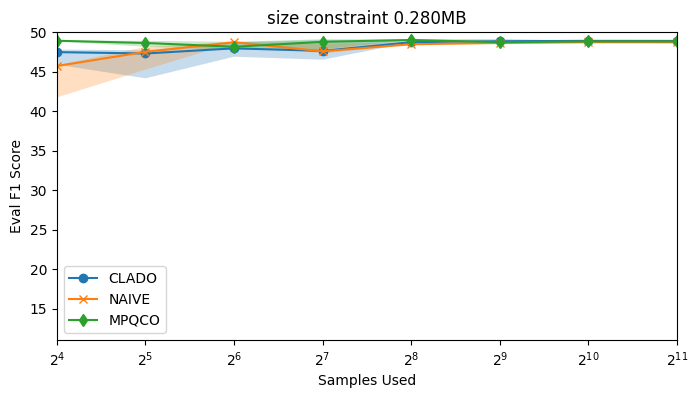

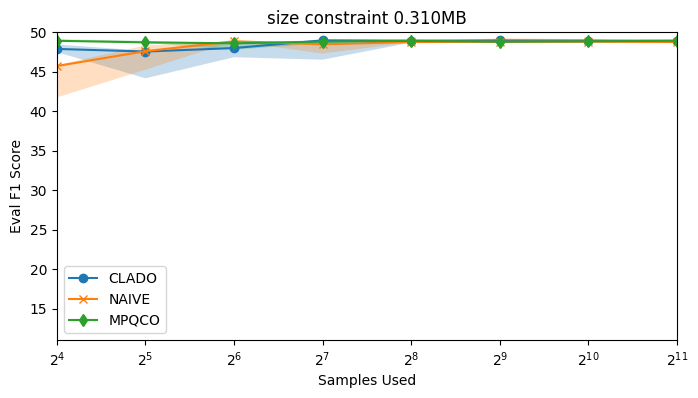

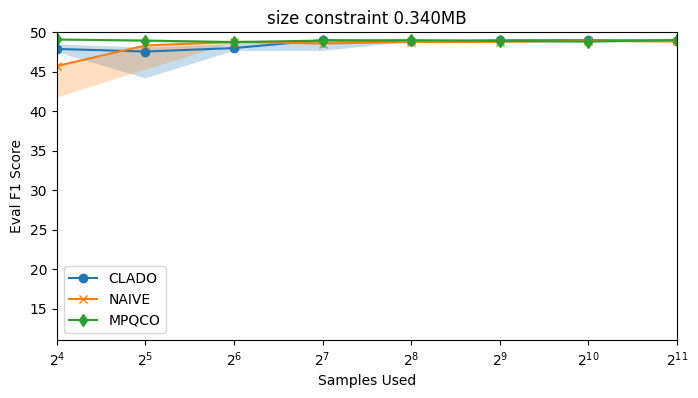

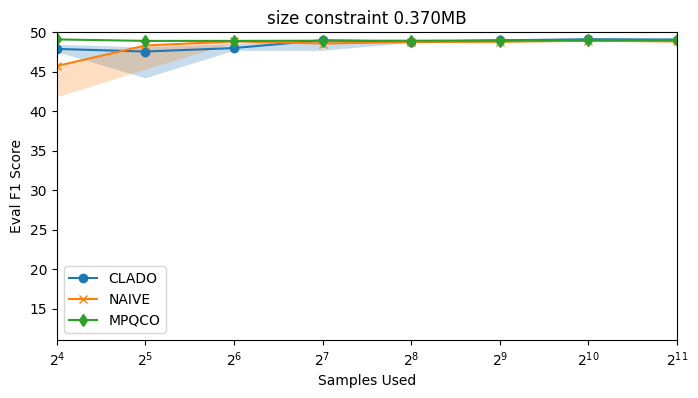

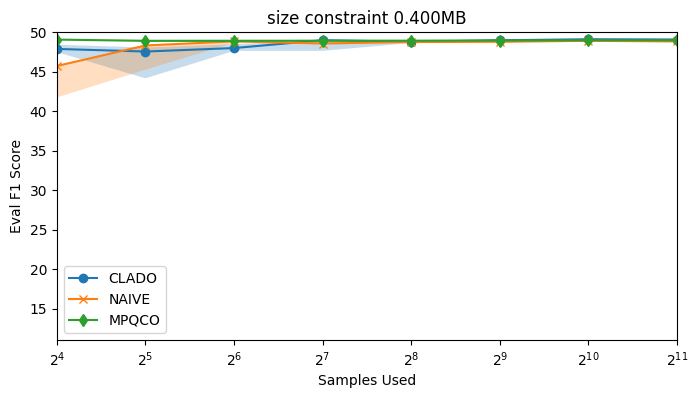

In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
#size_bounds = np.linspace(0.10,0.40,150)
size_bounds = np.linspace(0.10,0.40,11)

n_runs = 5
n_sizes = len(batch_nums)
n_constraints = len(size_bounds)

# n_runs x n_batches x n_constraints 
clado_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)] 
clado_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
clado_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]


for i, batch_num in enumerate(batch_nums):
    for repeat in range(n_runs):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        #file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert_tiny/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8.pkl'
        file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert_tiny/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8_size-bound.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f)  
        for method in methods:
            j = 0  
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_f1[repeat][i][j] = {eval_f1}'
                exec(cmd)
                cmd = f'{method}_exact_match[repeat][i][j] = {eval_exact_match}'
                exec(cmd)
                cmd = f'{method}_eval_loss[repeat][i][j] = {eval_loss}'
                exec(cmd)
                j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)

xs = 2**np.arange(f1_clado.shape[1]) * 16
for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 11, 50])

    plt.plot(xs, np.quantile(f1_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(f1_clado[:,:,i],0.75,axis=0),
                     np.quantile(f1_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(f1_naive[:,:,i],0.75,axis=0),
                    np.quantile(f1_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(f1_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(f1_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(f1_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval F1 Score')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()

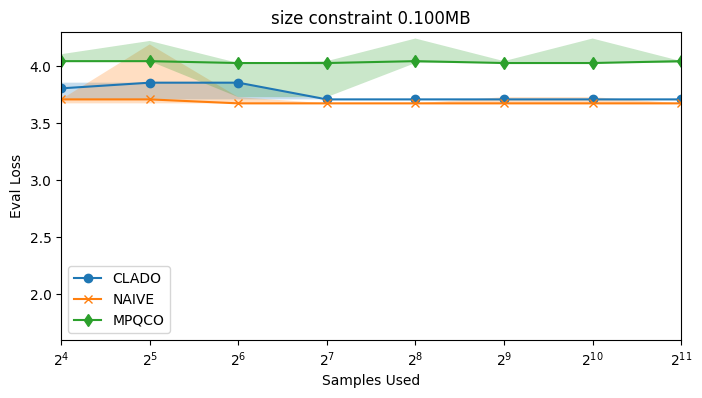

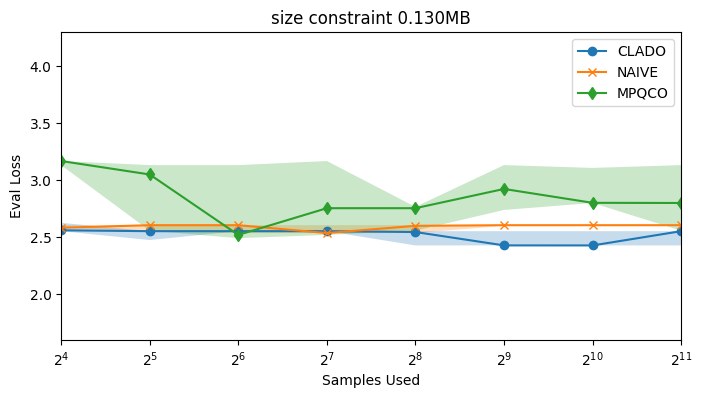

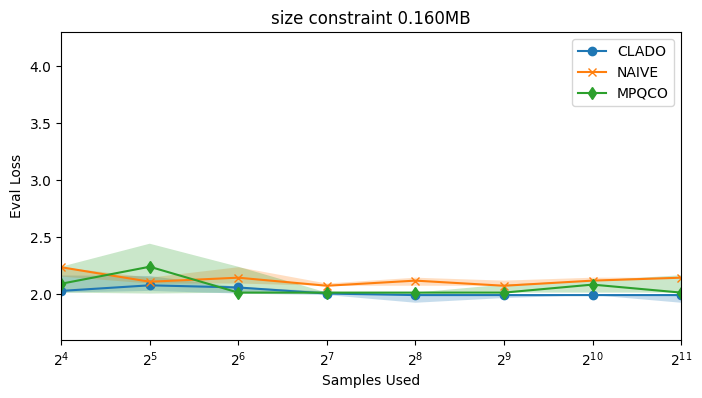

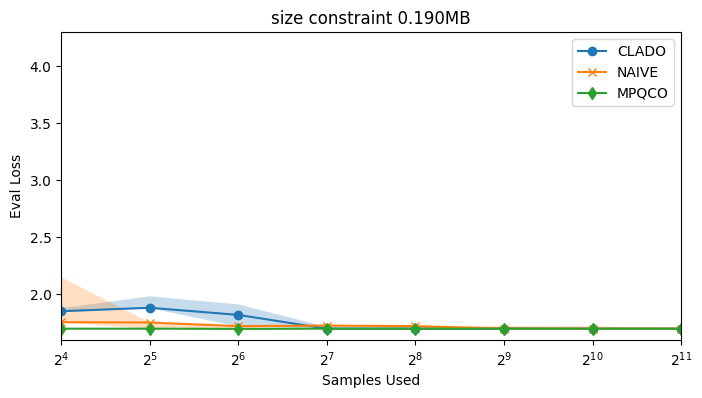

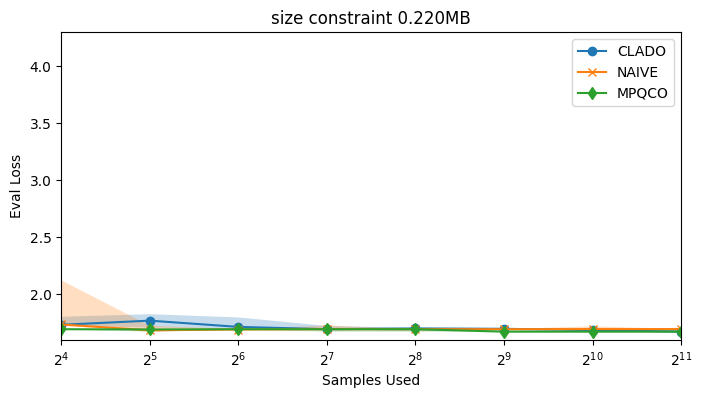

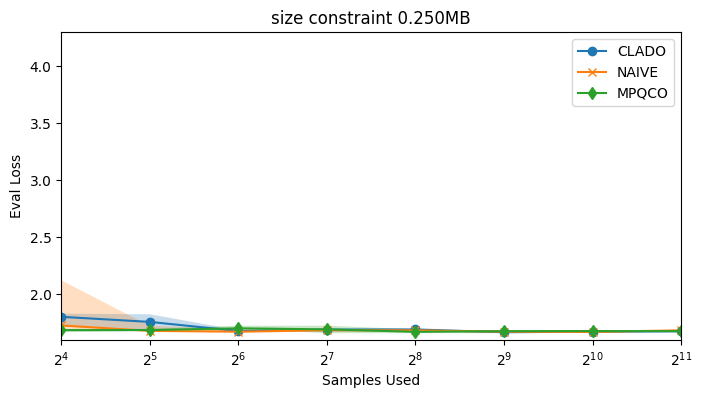

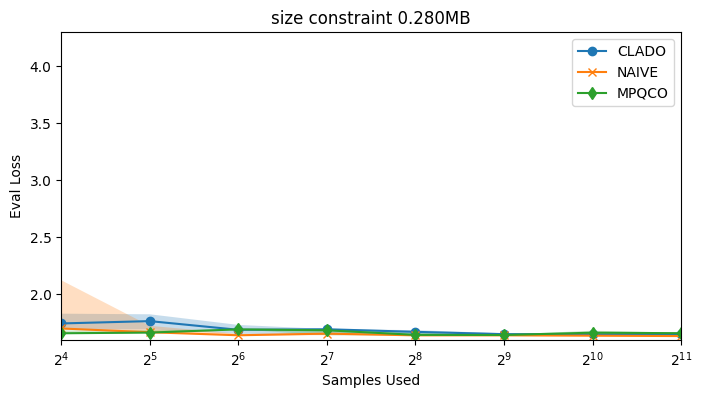

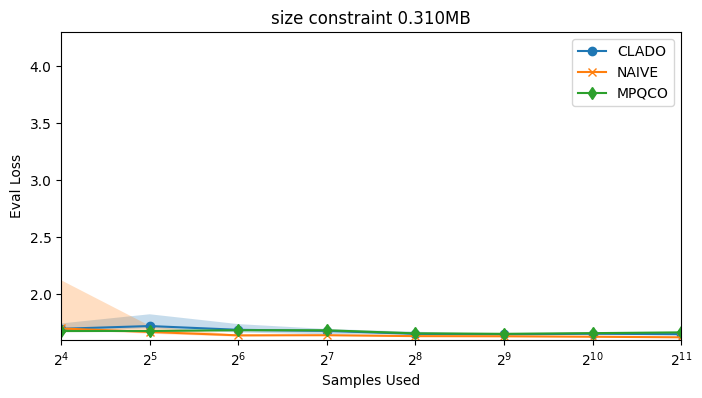

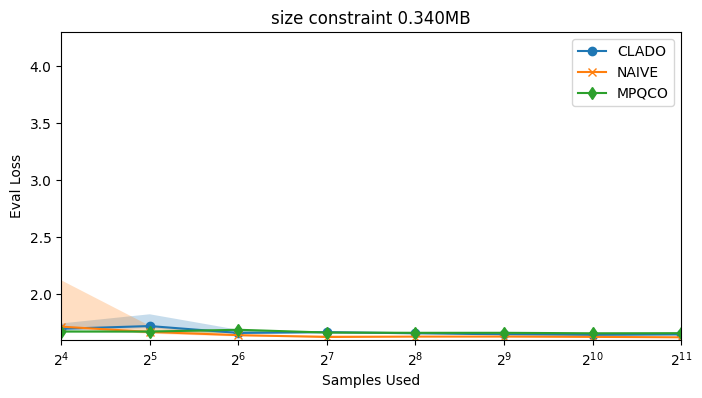

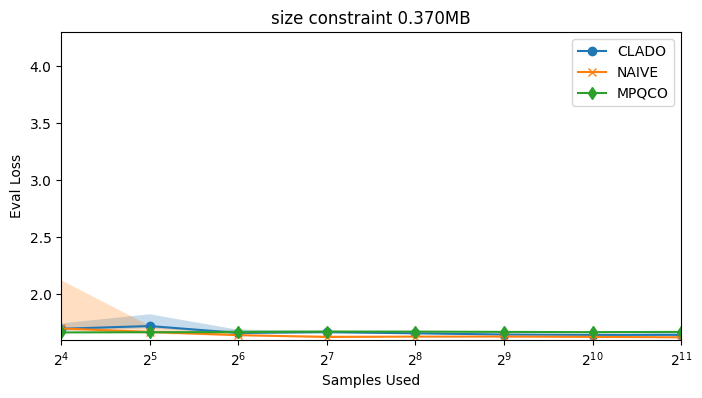

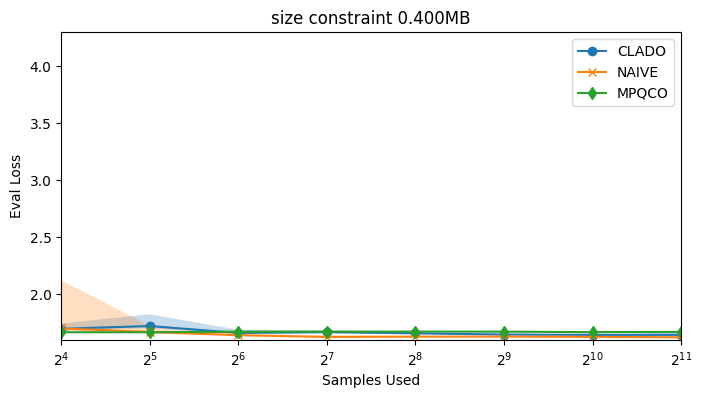

In [4]:
eval_loss_clado = np.array(clado_eval_loss)
eval_loss_naive = np.array(naive_eval_loss)
eval_loss_mpqco = np.array(mpqco_eval_loss)

for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 1.6, 4.3])
    plt.plot(xs, np.quantile(eval_loss_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(eval_loss_clado[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(eval_loss_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(eval_loss_naive[:,:,i],0.75,axis=0),
                    np.quantile(eval_loss_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(eval_loss_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(eval_loss_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval Loss')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()

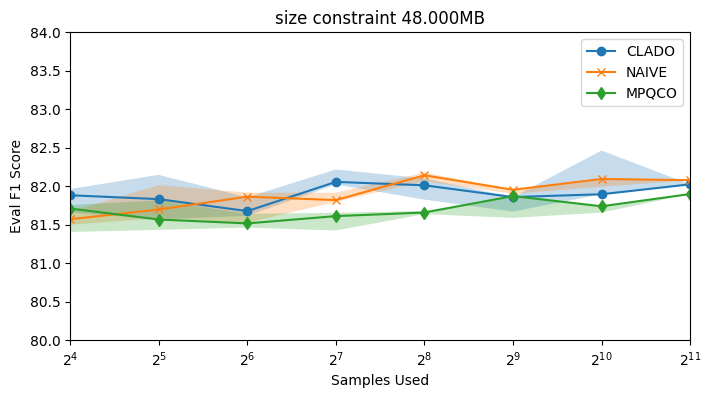

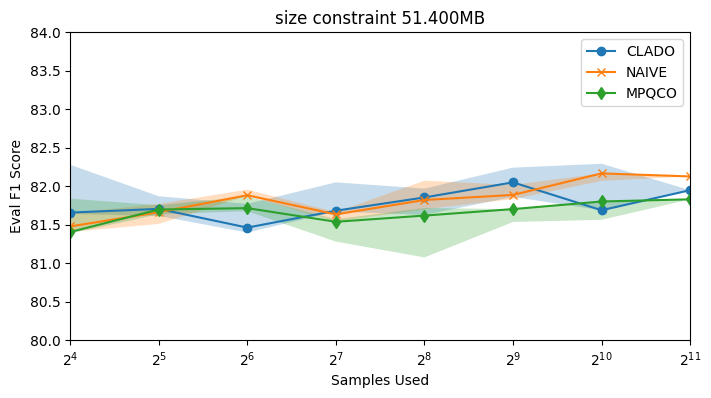

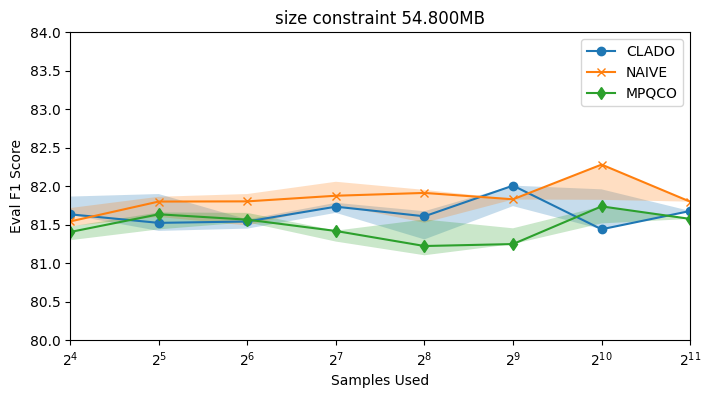

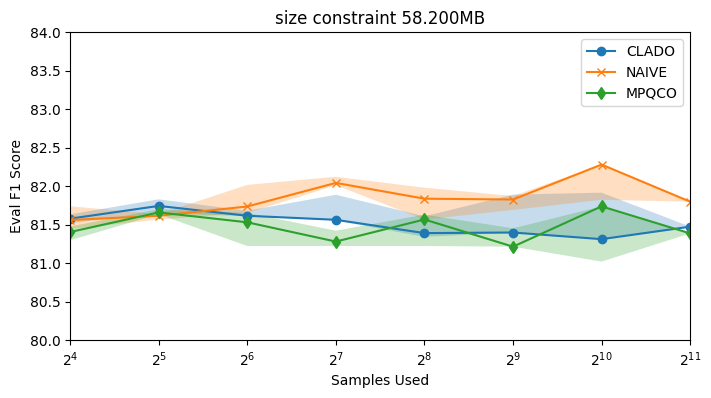

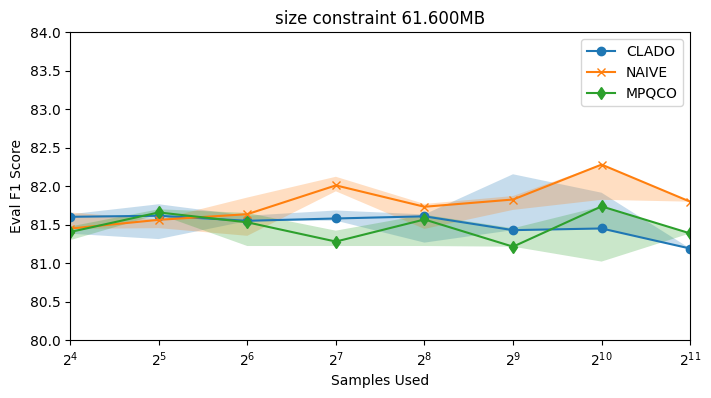

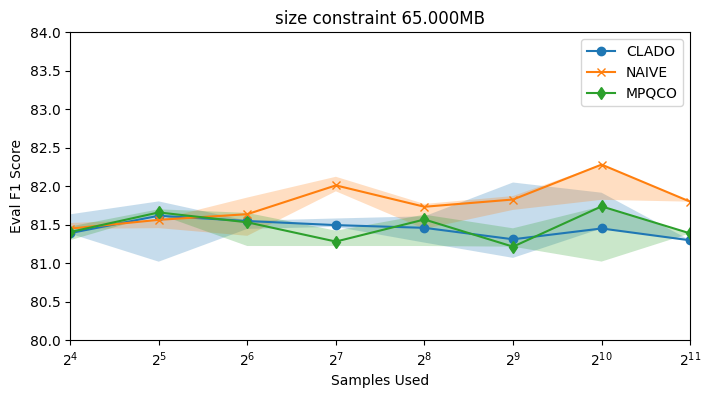

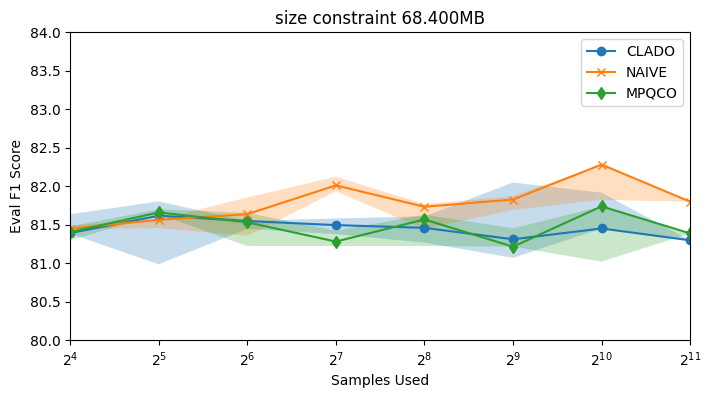

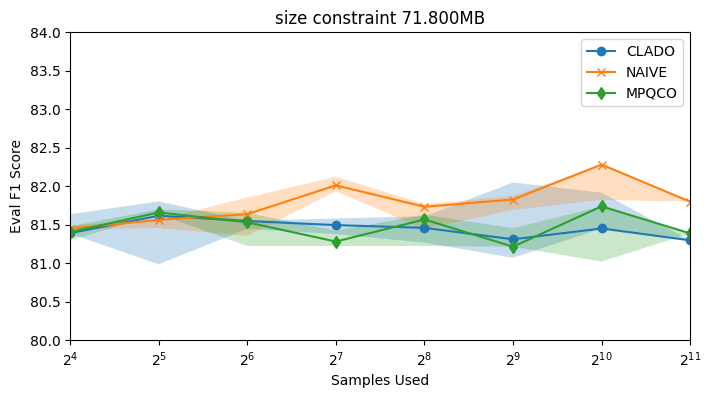

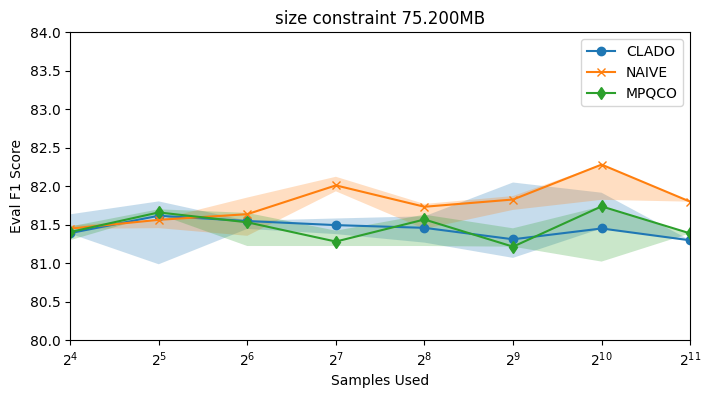

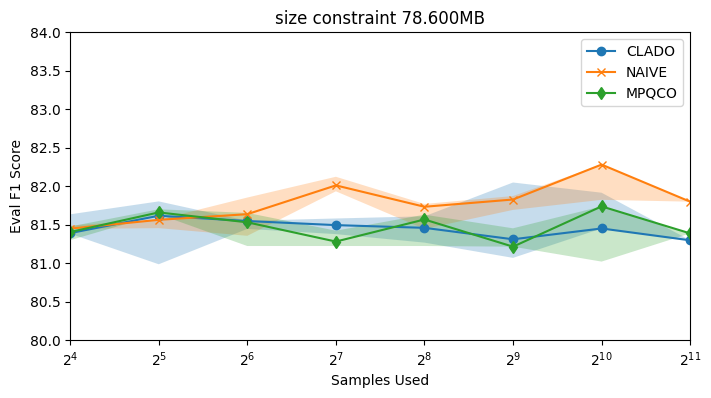

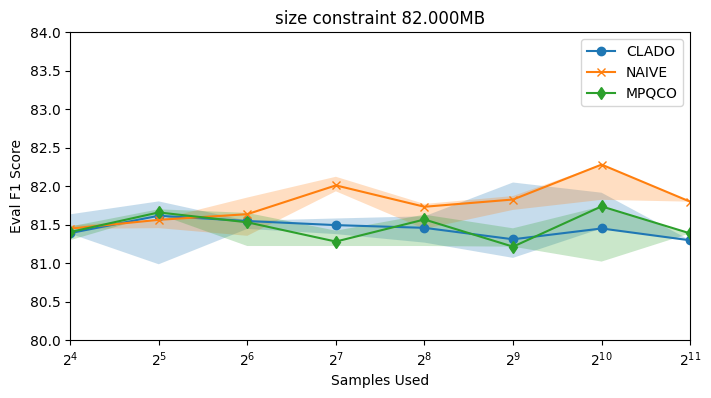

In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np



batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(48, 82, 11)

n_runs = 5
n_sizes = len(batch_nums)
n_constraints = len(size_bounds)

# n_runs x n_batches x n_constraints 
clado_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)] 
clado_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
clado_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]


for i, batch_num in enumerate(batch_nums):
    for repeat in range(n_runs):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        if n_samples == 512: # There are 4 runs, repeat the last run two times
            if start_batch == 256:
                start_batch = 192
                end_batch = 255
        elif n_samples == 1024: #there are only two runs, repeat each run two times 
            if start_batch == 256:
                start_batch = 0
                end_batch = start_batch + 127
            elif start_batch == 384:
                start_batch = 128
                end_batch = start_batch + 127
            elif start_batch == 512:
                start_batch = 0
                end_batch = start_batch + 127        
                
        elif n_samples == 2048: #there is only one run, repeat it 5 times
            start_batch = 0
            end_batch = 255
    
        file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert_base/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4_calib128_batches_{start_batch}-{end_batch}_bs8_size-bound.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f)  
        for method in methods:
            j = 0  
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_f1[repeat][i][j] = {eval_f1}'
                exec(cmd)
                cmd = f'{method}_exact_match[repeat][i][j] = {eval_exact_match}'
                exec(cmd)
                cmd = f'{method}_eval_loss[repeat][i][j] = {eval_loss}'
                exec(cmd)
                j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)

xs = 2**np.arange(f1_clado.shape[1]) * 16
for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 80, 84])

    plt.plot(xs, np.quantile(f1_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(f1_clado[:,:,i],0.75,axis=0),
                     np.quantile(f1_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(f1_naive[:,:,i],0.75,axis=0),
                    np.quantile(f1_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(f1_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(f1_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(f1_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval F1 Score')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()